In [1]:
import pandas as pd
import numpy as np

### 0. preprocessing

In [2]:
adhd = pd.read_csv('adhd_origin.csv')
bipolar = pd.read_csv('bipolar_origin.csv')

In [4]:
(len(adhd), len(bipolar))

(256065, 162986)

In [6]:
# remove deleted, removed , na
deleted_author = adhd[adhd['author'] == '[deleted]']
adhd = adhd.drop(deleted_author.index)
adhd = adhd.drop(adhd[adhd['text_context'] == '[deleted]'].index)
adhd = adhd.drop(adhd[adhd['text_context'] == '[removed]'].index)
content_null = adhd[adhd['text_context'].isnull()].index
adhd= adhd.drop(content_null)
len(adhd)

213404

In [7]:
deleted_author = bipolar[bipolar['author'] == '[deleted]']
bipolar = bipolar.drop(deleted_author.index)
bipolar = bipolar.drop(bipolar[bipolar['text_context'] == '[deleted]'].index)
bipolar = bipolar.drop(bipolar[bipolar['text_context'] == '[removed]'].index)
content_null = bipolar[bipolar['text_context'].isnull()].index
bipolar= bipolar.drop(content_null)
len(bipolar)

113001

In [10]:
bipolar.to_csv('bipolar_origin2.csv', index = False)
adhd.to_csv('adhd_origin2.csv', index = False)

In [2]:
adhd = pd.read_csv('adhd_origin2.csv')
bipolar = pd.read_csv('bipolar_origin2.csv')

### 1. for making sanity file

- 1000개의 글 추리기

In [12]:
a_sanity = adhd.sample(n=1000)
b_sanity = bipolar.sample(n=1000)

In [15]:
a_sanity.to_csv('adhd_sanity_1000.csv', index = False)
b_sanity.to_csv('bipolar_sanity_1000.csv', index = False)

In [3]:
a_sanity = pd.read_csv('adhd_sanity_with_labMT.csv')
b_sanity = pd.read_csv('bipolar_sanity_with_labMT.csv')

In [70]:
a_sample = a_sanity['title'].iloc[3] + ' '+ a_sanity['text_context'].iloc[3]
a_sample = a_sample.replace('\n', ' ')
a_sample

'Dex and jaw pain I’ve just increased my dex dose and I am getting a few really annoying side effects - I have bad jaw pain, and my teeth are aching. Also I feel like I am having weird tongue movements - I am starting to get ulcers in my mouth and feel like I have too much saliva.   Any advice?!? I feel a lot better on the higher dose but the pain in my mouth is staring to be just as distracting as my mind normally is! So frustrating!'

### 2. codes for LabMT

- issue
    - why nagative values?
    

### 1) download

In [21]:
# install: https://pypi.org/project/labMTsimple/
!git clone https://github.com/andyreagan/labMT-simple.git

fatal: destination path 'labMT-simple' already exists and is not an empty directory.


In [34]:
import os
os.chdir('./labMT-simple')

In [25]:
!echo '0000'|sudo -S python setup.py install

Password:running install
running build
running build_py
creating build
creating build/lib
creating build/lib/labMTsimple
copying labMTsimple/applescript.py -> build/lib/labMTsimple
copying labMTsimple/speedy.py -> build/lib/labMTsimple
copying labMTsimple/storyLab.py -> build/lib/labMTsimple
copying labMTsimple/__init__.py -> build/lib/labMTsimple
copying labMTsimple/chrome-print.py -> build/lib/labMTsimple
creating build/lib/labMTsimple/data
creating build/lib/labMTsimple/data/LabMT
copying labMTsimple/data/LabMT/labMT2indonesian.txt -> build/lib/labMTsimple/data/LabMT
copying labMTsimple/data/LabMT/labMT2korean.txt -> build/lib/labMTsimple/data/LabMT
copying labMTsimple/data/LabMT/labMT2chinese.txt -> build/lib/labMTsimple/data/LabMT
copying labMTsimple/data/LabMT/labMT2pashto.txt -> build/lib/labMTsimple/data/LabMT
copying labMTsimple/data/LabMT/labMT2russian.txt -> build/lib/labMTsimple/data/LabMT
copying labMTsimple/data/LabMT/labMT1.txt -> build/lib/labMTsimple/data/LabMT
copying

In [31]:
!python test/test.py

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/labMTsimple/speedy.py", line 48, in openWithPath
    f = codecs.open(filename,mode,'utf8')
  File "/opt/anaconda3/lib/python3.7/codecs.py", line 904, in open
    file = builtins.open(filename, mode, buffering)
FileNotFoundError: [Errno 2] No such file or directory: 'data/LIWC/LIWC2007_header.dic'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "test/test.py", line 364, in <module>
    my_LIWC_stopped = LIWC(stopVal=0.5)
  File "/opt/anaconda3/lib/python3.7/site-packages/labMTsimple/speedy.py", line 310, in __init__
    self.data = self.loadDict(bananas,lang)
  File "/opt/anaconda3/lib/python3.7/site-packages/labMTsimple/speedy.py", line 443, in loadDict
    f = self.openWithPath("data/LIWC/LIWC20"+self.year+"_header.dic","r")
  File "/opt/anaconda3/lib/python3.7/site-packages/labMTsimple/speedy.py", line 55, in openWithPath
    f = codecs

In [30]:
!pip install marisa-trie

     |████████████████████████████████| 270 kB 637 kB/s eta 0:00:01
  Created wheel for marisa-trie: filename=marisa_trie-0.7.5-cp37-cp37m-macosx_10_9_x86_64.whl size=176260 sha256=e30d130345cb2c2f6e135858e6fe35252e7a9b01e200b10ec2c8d1e85b72db36
  Stored in directory: /Users/midan/Library/Caches/pip/wheels/01/ac/46/c838fd1aee138a8fd92ae30b04020995182eb4d99dec1e12ea
Successfully built marisa-trie


In [32]:
!pip install nose2

     |████████████████████████████████| 137 kB 755 kB/s eta 0:00:01
     |████████████████████████████████| 205 kB 1.5 MB/s eta 0:00:01


In [33]:
os.chdir('/Users/midan/_midanniiii/2020-2/캡스톤디자인2/codes')
!nose2


----------------------------------------------------------------------
Ran 0 tests in 0.000s

OK


In [36]:
# demo
import os
os.chdir('./labMT-simple/examples')

In [37]:
!python example-001.py

the word laughter in the hash has the data:
['1', '8.50', '0.9313', '3600', '--', '--', '1728\r\n']
the top 5 scores, and those words, are:
[8.5, 8.44, 8.42, 8.3, 8.26]
['laughter', 'happiness', 'love', 'happy', 'laughed']
computing happiness...


In [ ]:
!python example-002.py # same content, but python2

In [12]:
import os
os.chdir('/Users/midan/_midanniiii/2020-2/캡스톤디자인2/codes/labMT-simple')

In [8]:
try:
    reload
except NameError:
    # Python 3
    from importlib import reload

In [216]:
!pip install recommonmark
!make html
!make latexpdf
!git add -f *
!git commit -am "new docs, probably should just add a pre-commit hook"

     |████████████████████████████████| 51 kB 1.0 MB/s eta 0:00:01
sphinx-build -b html -d build/doctrees   source build/html
Running Sphinx v2.4.0
making output directory... done
/opt/anaconda3/lib/python3.7/site-packages/sphinx/util/compat.py:32: RemovedInSphinx30Warning: The config variable "source_parsers" is deprecated. Please update your extension for the parser and remove the setting.
  RemovedInSphinx30Warning)
/opt/anaconda3/lib/python3.7/site-packages/sphinx/util/compat.py:36: RemovedInSphinx30Warning: app.add_source_parser() does not support suffix argument. Use app.add_source_suffix() instead.
  app.add_source_parser(suffix, parser)
building [mo]: targets for 0 po files that are out of date
building [html]: targets for 7 source files that are out of date
updating environment: [new config] 7 added, 0 changed, 0 removed
/opt/anaconda3/lib/python3.7/site-packages/recommonmark/parser.py:75: UserWarning: Container node skipped: type=document
  warn("Container node skipped: type=

In [7]:
import sys, os
from labMTsimple.storyLab import *
import codecs ## handle utf8
#emotionFileReader(stopval=0.0,lang='english',returnVector=True)

In [5]:
!pwd

/Users/midan/_midanniiii/2020-2/캡스톤디자인2/codes/labMT-simple


In [14]:
labMT,labMTvector,labMTwordList = emotionFileReader(stopval=0.0,lang='english',returnVector=True)

In [26]:
for i in range(len(labMT)):
    if labMTwordList[i] =='i': print((labMTwordList[i], labMTvector[i]))
    elif labMTwordList[i] =='he': print((labMTwordList[i], labMTvector[i]))
    elif labMTwordList[i] =='she': print((labMTwordList[i], labMTvector[i]))
    elif labMTwordList[i] =='we': print((labMTwordList[i], labMTvector[i]))
    elif labMTwordList[i] =='not': print((labMTwordList[i], labMTvector[i]))    
    elif "n't" in labMTwordList[i] : print((labMTwordList[i], labMTvector[i]))
    elif "'s" in labMTwordList[i] : print((labMTwordList[i], labMTvector[i]))
    #if len(labMTwordList[i])<=3: 
        #print((labMTwordList[i], labMTvector[i]))

("mother's", 7.66)
("friend's", 7.36)
("valentine's", 7.36)
("children's", 7.14)
("woman's", 7.12)
("dad's", 7.0)
("mom's", 6.78)
("father's", 6.74)
("book's", 6.62)
("child's", 6.6)
("family's", 6.48)
("party's", 6.42)
("80's", 6.38)
('we', 6.38)
("women's", 6.32)
("bridegroom's", 6.28)
('she', 6.18)
("university's", 6.12)
("life's", 6.1)
("tomorrow's", 6.1)
("america's", 6.04)
("1980's", 6.02)
("1990's", 6.0)
("king's", 6.0)
("today's", 6.0)
("tonight's", 5.98)
("everyone's", 5.96)
("world's", 5.96)
("nation's", 5.94)
("1970's", 5.92)
('i', 5.92)
("city's", 5.88)
("country's", 5.86)
("japan's", 5.86)
("god's", 5.8)
("group's", 5.8)
("master's", 5.8)
("men's", 5.8)
("team's", 5.74)
("1960's", 5.7)
("obama's", 5.66)
("people's", 5.66)
("1950's", 5.64)
("night's", 5.64)
("man's", 5.58)
("she's", 5.52)
("let's", 5.46)
('he', 5.42)
("state's", 5.42)
("treasury's", 5.42)
("yesterday's", 5.38)
("someone's", 5.32)
("one's", 5.3)
("president's", 5.3)
("year's", 5.3)
("that's", 5.28)
("york's"

In [96]:
len(labMT)

10222

In [100]:
for i in range(20):
    print((labMTwordList[i], labMTvector[i]))
print()
for i in range(10221, 10202, -1):
    print((labMTwordList[i], labMTvector[i]))

('laughter', 8.5)
('happiness', 8.44)
('love', 8.42)
('happy', 8.3)
('laughed', 8.26)
('laugh', 8.22)
('laughing', 8.2)
('excellent', 8.18)
('laughs', 8.18)
('joy', 8.16)
('successful', 8.16)
('win', 8.12)
('rainbow', 8.1)
('smile', 8.1)
('won', 8.1)
('pleasure', 8.08)
('smiled', 8.08)
('rainbows', 8.06)
('winning', 8.04)
('celebration', 8.02)

('terrorist', 1.3)
('suicide', 1.3)
('rape', 1.44)
('terrorism', 1.48)
('murder', 1.48)
('death', 1.54)
('cancer', 1.54)
('killed', 1.56)
('kill', 1.56)
('died', 1.56)
('torture', 1.58)
('raped', 1.64)
('deaths', 1.64)
('arrested', 1.64)
('killing', 1.7)
('die', 1.74)
('terror', 1.76)
('jail', 1.76)
('kills', 1.78)


In [8]:
def my_labMT(text):
    labMT,labMTvector,labMTwordList = emotionFileReader(stopval=0.0,lang='english',returnVector=True)
    ## compute valence score and return frequency vector for generating wordshift
    Valence,Fvec = emotion(text,labMT,shift=True,happsList=labMTvector)
    ## but we didn't apply a lens yet, so stop the vectors first
    StoppedVec = stopper(Fvec,labMTvector,labMTwordList,stopVal=1.0)
    Valence = emotionV(StoppedVec,labMTvector)
    #print('the valence of {0} is {1:.5}'.format('input data',Valence))
    return Valence

In [33]:
sample = a_sanity['text_context'].iloc[0]
print(sample)
print(my_labMT(sample))

I have Bipolar I, Fibromyalgia, and most recently was diagnosed with ADHD (which I’ve suspected for most of my adult life, but my mom didn’t believe I had it even though both my brother and dad have it 🙄 Maybe because I’m a girl and my grades were good until college). 

Now as an adult in my career field, I wish I could get medicated for my ADHD. Unfortunately, the medications I take for my Bipolar I &amp; Fibromyalgia don’t mix with ADHD meds. At least, that’s what my pdoc says. I can see how that may be considering how dangerous my manic episodes and my depression can get (I’ve been hospitalized twice). 

I constantly feel like I’m not good enough at my job because I can only finish a few projects in a day, or I work on one project or I get distracted and start on another and I don’t really complete either. I’ve also missed so much work due to my Fibromyalgia and my most recent hospitalization.

When I am good at my job, I am EXCELLENT, but those moments don’t happen as often as I’d 

In [38]:
sample_list = ["I have Bipolar I, Fibromyalgia, and most recently was diagnosed with ADHD", 
              "which I’ve suspected for most of my adult life, but my mom didn’t believe I had it even though both my brother and dad have it",
              "Maybe because I’m a girl and my grades were good until college",
              "Now as an adult in my career field, I wish I could get medicated for my ADHD",
              "Unfortunately, the medications I take for my Bipolar I &amp",
              "Fibromyalgia don’t mix with ADHD meds",
              "At least, that’s what my pdoc says",
              "I can see how that may be considering how dangerous my manic episodes and my depression can get",
              "I’ve been hospitalized twice"]
mean = 0
total = ""
for text in sample_list:
    temp = my_labMT(text)
    print(temp)
    mean+=temp
    total+=text
    total+='. '
mean/=len(sample_list)
print()
print(mean)
print(my_labMT(total))


6.22
6.387272727272727
6.825
6.4079999999999995
4.46
-1
5.08
4.5600000000000005
-1

4.215585858585858
5.923333333333333


In [13]:
print(my_labMT("I don't like you"))
print(my_labMT("I like you"))

print(my_labMT('like'))
print(my_labMT("don't like"))

print(my_labMT("I don't like sadness"))
print(my_labMT("I like sadness"))

5.72
6.73
7.22
5.46
4.266666666666667
4.55


In [10]:
print(my_labMT(a_sanity['text_context'].iloc[3]))

NameError: name 'a_sanity' is not defined

In [14]:
print(my_labMT( a_sanity['title'].iloc[3] + ' '+ a_sanity['text_context'].iloc[3]) )

5.198947368421052


In [16]:
a_c = [] #only context
a_tc = [] # title + context
b_c = [] #only context
b_tc = [] # title + context

for i in range(1000):
    print(str(i)+'th task!')
    # for ADHD
    a_c.append(my_labMT(a_sanity['text_context'].iloc[i]))
    a_tc.append(my_labMT(a_sanity['title'].iloc[i] + ' '+ a_sanity['text_context'].iloc[i]))
    # for Bipolar
    b_c.append(my_labMT(b_sanity['text_context'].iloc[i]))
    b_tc.append(my_labMT(b_sanity['title'].iloc[i] + ' '+ b_sanity['text_context'].iloc[i]))

0th task!
1th task!
2th task!
3th task!
4th task!
5th task!
6th task!
7th task!
8th task!
9th task!
10th task!
11th task!
12th task!
13th task!
14th task!
15th task!
16th task!
17th task!
18th task!
19th task!
20th task!
21th task!
22th task!
23th task!
24th task!
25th task!
26th task!
27th task!
28th task!
29th task!
30th task!
31th task!
32th task!
33th task!
34th task!
35th task!
36th task!
37th task!
38th task!
39th task!
40th task!
41th task!
42th task!
43th task!
44th task!
45th task!
46th task!
47th task!
48th task!
49th task!
50th task!
51th task!
52th task!
53th task!
54th task!
55th task!
56th task!
57th task!
58th task!
59th task!
60th task!
61th task!
62th task!
63th task!
64th task!
65th task!
66th task!
67th task!
68th task!
69th task!
70th task!
71th task!
72th task!
73th task!
74th task!
75th task!
76th task!
77th task!
78th task!
79th task!
80th task!
81th task!
82th task!
83th task!
84th task!
85th task!
86th task!
87th task!
88th task!
89th task!
90th task!
91th task

In [17]:
a_labMT = pd.DataFrame( {
    'LabMT_of_context': a_c,
    'LabMT_of_title+context': a_tc
})
a_labMT

,LabMT_of_context,LabMT_of_title+context
0,5.958356,5.973867
1,6.090698,6.090698
2,5.757143,5.896000
3,5.371111,5.198947
4,6.063077,6.105455
...,...,...
995,5.851579,5.904938
996,6.110000,6.131111
997,5.560000,5.642439
998,5.929000,6.057917


In [18]:
b_labMT = pd.DataFrame( {
    'LabMT_of_context': b_c,
    'LabMT_of_title+context': b_tc
})
b_labMT

,LabMT_of_context,LabMT_of_title+context
0,5.389412,5.373684
1,6.143086,6.007273
2,6.250000,6.260000
3,5.171034,5.118000
4,5.046471,4.910556
...,...,...
995,5.210000,4.997333
996,5.518947,5.518947
997,5.611239,5.611239
998,7.060000,6.780000


In [24]:
a_sanity = pd.concat([a_sanity, a_labMT], axis = 1)
b_sanity = pd.concat([b_sanity, b_labMT], axis = 1)

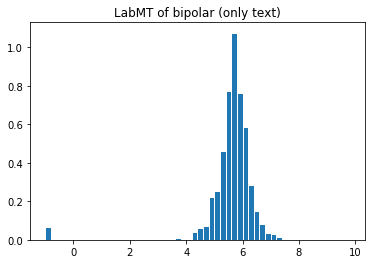

<Figure size 7200x5760 with 0 Axes>

In [17]:
plt.hist(b_labMT.iloc[:,0], bins=np.arange(-1,10,0.2), density = True, ec='w')
plt.title('LabMT of bipolar (only text)')
plt.figure(figsize=(100, 80))
plt.savefig('bipolar_labMT.png', dpi=300)

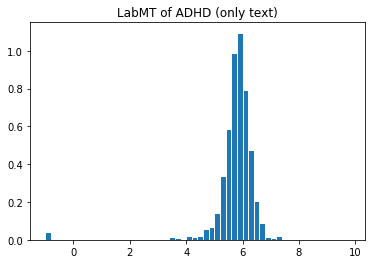

<Figure size 7200x5760 with 0 Axes>

In [16]:
plt.hist(a_labMT.iloc[:,0], bins=np.arange(-1,10,0.2), density = True, ec='w')
plt.title('LabMT of ADHD (only text)')
plt.figure(figsize=(100, 80))
plt.savefig('adhd_labMT.png')

In [ ]:
fig = sns.kdeplot(b_c, shade=True, color='red',cut =0, clip=(-1,10))
fig = sns.kdeplot(b_tc, shade=True, color='blue', cut =0, clip=(-1,10))

fig.figure.suptitle("LabMT for bipolar", fontsize = 14)
plt.xlabel('Score of context', fontsize=18)
plt.ylabel('Distribution', fontsize=16)
plt.figure(figsize=(100, 80))
plt.savefig('bipolar_labMT2.png')

In [78]:
!pwd

/Users/midan/_midanniiii/2020-2/캡스톤디자인2/codes/labMT-simple


In [22]:
os.chdir('/Users/midan/_midanniiii/2020-2/캡스톤디자인2/codes')

In [3]:
# for all mental illness
anx_sanity = pd.read_csv('anxiety_sanity_1000.csv')
d_sanity = pd.read_csv('depression_sanity_1000.csv')
s_sanity = pd.read_csv('schizo_sanity_1000.csv')

In [7]:
anx_c = [] #only context
anx_tc = [] # title + context
s_c = [] #only context
s_tc = [] # title + context
d_c = [] #only context
d_tc = [] # title + context
a_c = []
a_tc = []
b_c = []
b_tc = []

for i in range(1000):
    print(str(i)+'th task!')
    # for depression
    d_c.append(my_labMT(d_sanity['text_content'].iloc[i]))
    d_tc.append(my_labMT(d_sanity['title'].iloc[i] + ' '+ d_sanity['text_content'].iloc[i]))
    # for anxiety
    anx_c.append(my_labMT(anx_sanity['text_context'].iloc[i]))
    anx_tc.append(my_labMT(anx_sanity['title'].iloc[i] + ' '+ anx_sanity['text_context'].iloc[i]))
    # for anxiety
    s_c.append(my_labMT(s_sanity['text_context'].iloc[i]))
    s_tc.append(my_labMT(s_sanity['title'].iloc[i] + ' '+ s_sanity['text_context'].iloc[i]))
    # for adhd
    a_c.append(my_labMT(a_sanity['text_context'].iloc[i]))
    a_tc.append(my_labMT(a_sanity['title'].iloc[i] + ' '+ a_sanity['text_context'].iloc[i]))
    # for Bipolar
    b_c.append(my_labMT(b_sanity['text_context'].iloc[i]))
    b_tc.append(my_labMT(b_sanity['title'].iloc[i] + ' '+ b_sanity['text_context'].iloc[i]))

0th task!
1th task!
2th task!
3th task!
4th task!
5th task!
6th task!
7th task!
8th task!
9th task!
10th task!
11th task!
12th task!
13th task!
14th task!
15th task!
16th task!
17th task!
18th task!
19th task!
20th task!
21th task!
22th task!
23th task!
24th task!
25th task!
26th task!
27th task!
28th task!
29th task!
30th task!
31th task!
32th task!
33th task!
34th task!
35th task!
36th task!
37th task!
38th task!
39th task!
40th task!
41th task!
42th task!
43th task!
44th task!
45th task!
46th task!
47th task!
48th task!
49th task!
50th task!
51th task!
52th task!
53th task!
54th task!
55th task!
56th task!
57th task!
58th task!
59th task!
60th task!
61th task!
62th task!
63th task!
64th task!
65th task!
66th task!
67th task!
68th task!
69th task!
70th task!
71th task!
72th task!
73th task!
74th task!
75th task!
76th task!
77th task!
78th task!
79th task!
80th task!
81th task!
82th task!
83th task!
84th task!
85th task!
86th task!
87th task!
88th task!
89th task!
90th task!
91th task

In [8]:
a_labMT = pd.DataFrame( {
    'LabMT_of_context': a_c,
    'LabMT_of_title+context': a_tc
})

b_labMT = pd.DataFrame( {
    'LabMT_of_context': b_c,
    'LabMT_of_title+context': b_tc
})

anx_labMT = pd.DataFrame( {
    'LabMT_of_context': anx_c,
    'LabMT_of_title+context': anx_tc
})

d_labMT = pd.DataFrame( {
    'LabMT_of_context': d_c,
    'LabMT_of_title+context': d_tc
})

s_labMT = pd.DataFrame( {
    'LabMT_of_context': s_c,
    'LabMT_of_title+context': s_tc
})

In [9]:
a_sanity = pd.concat([a_sanity, a_labMT], axis = 1)
b_sanity = pd.concat([b_sanity, b_labMT], axis = 1)
anx_sanity = pd.concat([anx_sanity, anx_labMT], axis = 1)
d_sanity = pd.concat([d_sanity, d_labMT], axis = 1)
s_sanity = pd.concat([s_sanity, s_labMT], axis = 1)

In [10]:
a_sanity.to_csv('adhd_sanity_with_labMT.csv', index = False)
b_sanity.to_csv('bipolar_sanity_with_labMT.csv', index = False)
anx_sanity.to_csv('anxiety_sanity_with_labMT.csv', index = False)
d_sanity.to_csv('depression_sanity_with_labMT.csv', index = False)
s_sanity.to_csv('schizo_sanity_with_labMT.csv', index = False)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
d_c = [] #only context
d_tc = [] # title + context

for i in range(1000):
    print(str(i)+'th task!')
    # for depression
    d_c.append(my_labMT(d_sanity['text_content'].iloc[i]))
    d_tc.append(my_labMT(d_sanity['title'].iloc[i] + ' '+ d_sanity['text_content'].iloc[i]))

0th task!
1th task!
2th task!
3th task!
4th task!
5th task!
6th task!
7th task!
8th task!
9th task!
10th task!
11th task!
12th task!
13th task!
14th task!
15th task!
16th task!
17th task!
18th task!
19th task!
20th task!
21th task!
22th task!
23th task!
24th task!
25th task!
26th task!
27th task!
28th task!
29th task!
30th task!
31th task!
32th task!
33th task!
34th task!
35th task!
36th task!
37th task!
38th task!
39th task!
40th task!
41th task!
42th task!
43th task!
44th task!
45th task!
46th task!
47th task!
48th task!
49th task!
50th task!
51th task!
52th task!
53th task!
54th task!
55th task!
56th task!
57th task!
58th task!
59th task!
60th task!
61th task!
62th task!
63th task!
64th task!
65th task!
66th task!
67th task!
68th task!
69th task!
70th task!
71th task!
72th task!
73th task!
74th task!
75th task!
76th task!
77th task!
78th task!
79th task!
80th task!
81th task!
82th task!
83th task!
84th task!
85th task!
86th task!
87th task!
88th task!
89th task!
90th task!
91th task

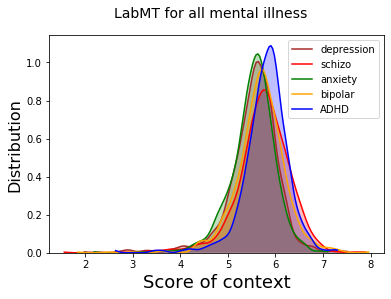

<Figure size 7200x5760 with 0 Axes>

In [32]:
#import seaborn as sns
fig = sns.kdeplot(d_c , shade=True, color='brown', cut =0, clip=(-1,10), label = 'depression')
fig = sns.kdeplot(s_c , shade=True, color='red', cut =0, clip=(-1,10), label = 'schizo')
fig = sns.kdeplot(anx_c , shade=True, color='green', cut =0, clip=(-1,10), label = 'anxiety')
fig = sns.kdeplot(b_c, shade=True, color='orange',cut =0, clip=(-1,10), label = 'bipolar')
fig = sns.kdeplot(a_c, shade=True, color='blue', cut =0, clip=(-1,10), label = 'ADHD')

fig.figure.suptitle("LabMT for all mental illness", fontsize = 14)
plt.xlabel('Score of context', fontsize=18)
plt.ylabel('Distribution', fontsize=16)
plt.figure(figsize=(100, 80))
plt.savefig('compare_labMT.png')

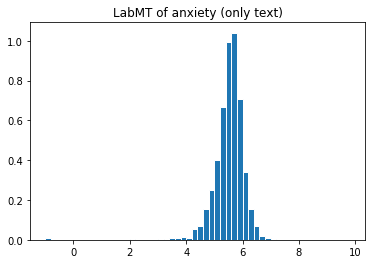

<Figure size 7200x5760 with 0 Axes>

In [31]:
plt.hist(anx_c, bins=np.arange(-1,10,0.2), density = True, ec='w')
plt.title('LabMT of anxiety (only text)')
plt.figure(figsize=(100, 80))
plt.savefig('anxiety_labMT.png')

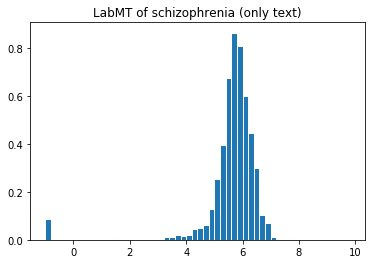

<Figure size 7200x5760 with 0 Axes>

In [30]:
plt.hist(s_c, bins=np.arange(-1,10,0.2), density = True, ec='w')
plt.title('LabMT of schizophrenia (only text)')
plt.figure(figsize=(100, 80))
plt.savefig('schizo_labMT.png')

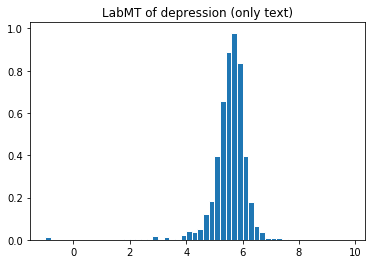

<Figure size 7200x5760 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
plt.hist(d_c, bins=np.arange(-1,10,0.2), density = True, ec='w')
plt.title('LabMT of depression (only text)')
plt.figure(figsize=(100, 80))
plt.savefig('depression_labMT.png')

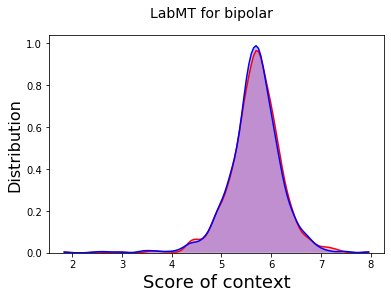

<Figure size 7200x5760 with 0 Axes>

In [26]:
fig = sns.kdeplot(b_c, shade=True, color='red',cut =0, clip=(-1,10))
fig = sns.kdeplot(b_tc, shade=True, color='blue', cut =0, clip=(-1,10))

fig.figure.suptitle("LabMT for bipolar", fontsize = 14)
plt.xlabel('Score of context', fontsize=18)
plt.ylabel('Distribution', fontsize=16)
plt.figure(figsize=(100, 80))
plt.savefig('bipolar_labMT2.png')

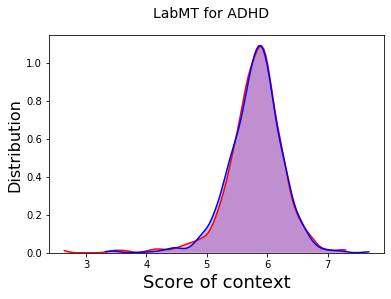

<Figure size 7200x5760 with 0 Axes>

In [27]:
fig = sns.kdeplot(a_c, shade=True, color='red',cut =0, clip=(-1,10))
fig = sns.kdeplot(a_tc, shade=True, color='blue', cut =0, clip=(-1,10))

fig.figure.suptitle("LabMT for ADHD", fontsize = 14)
plt.xlabel('Score of context', fontsize=18)
plt.ylabel('Distribution', fontsize=16)
plt.figure(figsize=(100, 80))
plt.savefig('adhd_labMT2.png')

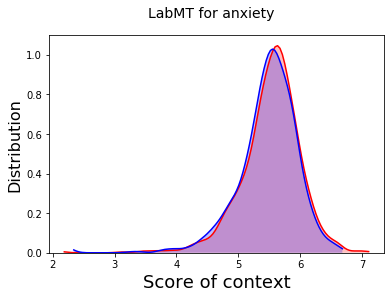

<Figure size 7200x5760 with 0 Axes>

In [28]:
fig = sns.kdeplot(anx_c, shade=True, color='red',cut =0, clip=(-1,10))
fig = sns.kdeplot(anx_tc, shade=True, color='blue', cut =0, clip=(-1,10))

fig.figure.suptitle("LabMT for anxiety", fontsize = 14)
plt.xlabel('Score of context', fontsize=18)
plt.ylabel('Distribution', fontsize=16)
plt.figure(figsize=(100, 80))
plt.savefig('anxiety_labMT2.png')

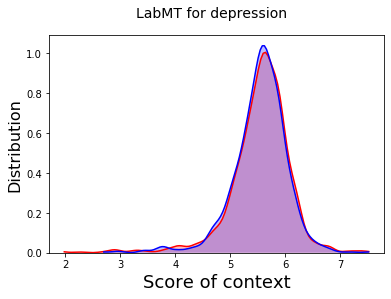

<Figure size 7200x5760 with 0 Axes>

In [29]:
fig = sns.kdeplot(d_c, shade=True, color='red',cut =0, clip=(-1,10))
fig = sns.kdeplot(d_tc, shade=True, color='blue', cut =0, clip=(-1,10))

fig.figure.suptitle("LabMT for depression", fontsize = 14)
plt.xlabel('Score of context', fontsize=18)
plt.ylabel('Distribution', fontsize=16)
plt.figure(figsize=(100, 80))
plt.savefig('depression_labMT2.png')

In [23]:
!pwd

/Users/midan/_midanniiii/2020-2/캡스톤디자인2/codes


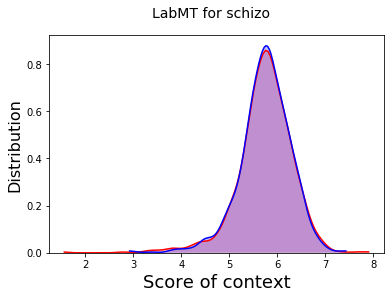

<Figure size 7200x5760 with 0 Axes>

In [24]:
fig = sns.kdeplot(s_c, shade=True, color='red',cut =0, clip=(-1,10))
fig = sns.kdeplot(s_tc, shade=True, color='blue', cut =0, clip=(-1,10))

fig.figure.suptitle("LabMT for schizo", fontsize = 14)
plt.xlabel('Score of context', fontsize=18)
plt.ylabel('Distribution', fontsize=16)
plt.figure(figsize=(100, 80))
plt.savefig('schizo_labMT2.png')

In [39]:
# check the values of stopwords
my_labMT('have')

-1

In [60]:
for i in range(len(labMTwordList)): 
    word = labMTwordList[i]
    if 'the'==word: print((word, labMTvector[i]))
    elif 'a'== word: print((word, labMTvector[i]))

('a', 5.24)
('the', 4.98)


In [55]:
personal_p = ['my', 'me', 'mine', 'you', 'u', 'yours', 'your',
              'he', 'we', 'she', 'her', 'his', 'him', 'hers', 'our', 'ours']
count = 0
for_delete = []
for i in range(len(labMTwordList)):
    if 'not' == labMTwordList[i]:
        #print('case 1:')
        print((labMTwordList[i], labMTvector[i]))
        for_delete.append(labMTwordList[i])
    elif "n't" in labMTwordList[i]:
        #print('case 2:')
        print((labMTwordList[i], labMTvector[i]))
        for_delete.append(labMTwordList[i])
    elif "n't" in labMTwordList[i]:
        #print('case 3:')
        print((labMTwordList[i], labMTvector[i]))
        for_delete.append(labMTwordList[i])
    elif "'s'" in labMTwordList[i]:
        #print('case 4:')
        print((labMTwordList[i], labMTvector[i]))
        for_delete.append(labMTwordList[i])
    elif labMTwordList[i] in personal_p:
        #print('case 5:')
        print((labMTwordList[i], labMTvector[i]))
        for_delete.append(labMTwordList[i])
    elif 'i' == labMTwordList[i]:
        #print('case 6:')
        print((labMTwordList[i], labMTvector[i]))
        for_delete.append(labMTwordList[i])
    else: count+=1
#print((len(labMT), count))
print('the stopwords for delete: ' + str( len(labMT) - count ))
print(for_delete)

('me', 6.58)
('we', 6.38)
('mine', 6.3)
('you', 6.24)
('yours', 6.24)
('she', 6.18)
('my', 6.16)
('our', 6.08)
('ours', 5.98)
('i', 5.92)
('her', 5.84)
('your', 5.6)
('his', 5.56)
('him', 5.54)
('u', 5.52)
('he', 5.42)
("isn't", 4.46)
("hadn't", 4.3)
("wasn't", 4.28)
("aren't", 4.12)
("hasn't", 4.02)
("weren't", 4.02)
("ain't", 4.0)
("didn't", 4.0)
('not', 3.86)
("shouldn't", 3.84)
("haven't", 3.82)
("wouldn't", 3.78)
("don't", 3.7)
("won't", 3.7)
("doesn't", 3.62)
("can't", 3.42)
("couldn't", 3.32)
the stopwords for delete: 33
['me', 'we', 'mine', 'you', 'yours', 'she', 'my', 'our', 'ours', 'i', 'her', 'your', 'his', 'him', 'u', 'he', "isn't", "hadn't", "wasn't", "aren't", "hasn't", "weren't", "ain't", "didn't", 'not', "shouldn't", "haven't", "wouldn't", "don't", "won't", "doesn't", "can't", "couldn't"]


In [65]:
for i in range(len(labMT)):
    if 'official' in labMTwordList[i]:
        print((labMTwordList[i], labMTvector[i]))

('official', 5.38)
('officially', 5.04)
('officials', 4.76)
